In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

RANDOM_SEED = 1212

## Data Loading

In [3]:
train = pd.read_csv('../data/small/train/orange_small_train.data', sep="\t")
train.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


In [4]:
churn_label = (
    pd.read_csv(
        "../data/small/labels/orange_small_train_churn.labels",
        sep="\t",
        header=None,
    )
    .iloc[:, 0]
    .astype("category")
)

churn_label.cat.rename_categories(["no", "yes"], inplace=True)

churn_label.head()

0     no
1    yes
2     no
3     no
4     no
Name: 0, dtype: category
Categories (2, object): [no, yes]

In [5]:
test = pd.read_csv("../data/small/test/orange_small_test.data", sep="\t")
test.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1225.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,P6pu4Vl,LM8l689qOp,NaN,ELof,7P5s,ZI9m,R4y5gQQWY8OodqDV,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,259.0,0.0,NaN,NaN,NaN,...,oslk,S46Rt72,LM8l689qOp,NaN,NaN,Qu4f,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,861.0,14.0,NaN,NaN,NaN,...,oslk,CcdTy9x,LM8l689qOp,NaN,NaN,7aLG,RAYp,F2FyR07IdsN7I,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,1568.0,7.0,NaN,NaN,NaN,...,oslk,Q53Rkup,LM8l689qOp,NaN,kG3k,7P5s,RAYp,TCU50_Yjmm6GIBZ0lL_,am7c,NaN
4,NaN,NaN,NaN,NaN,NaN,1197.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,WfsWw2A,LM8l689qOp,NaN,ELof,5Acm,ZI9m,iyHGyLCEkQ,am7c,NaN


## Dataframe Conversion

In [6]:
def convert_dataframe(DF):
    df_var_names = DF.columns

    df_types = {df_var_name: DF[df_var_name].dtype for df_var_name in df_var_names}

    for df_var_name in df_var_names:
        if df_types[df_var_name] == int:
            df = DF[df_var_name].astype(float)
            DF.loc[:, df_var_name] = df
            df_types[df_var_name] = df.dtype
            
        elif df_types[df_var_name] != float:
            df = DF[df_var_name].astype("category")
            DF.loc[:, df_var_name] = df
            df_types[df_var_name] = df.dtype

    return DF

In [7]:
train = convert_dataframe(train)

In [8]:
test = convert_dataframe(test)

## Train, Validation and Test split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    train, churn_label, test_size=0.2, random_state=RANDOM_SEED
)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=RANDOM_SEED
)

In [10]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(32000, 230)
(8000, 230)
(10000, 230)


## Data Cleaning and Filling

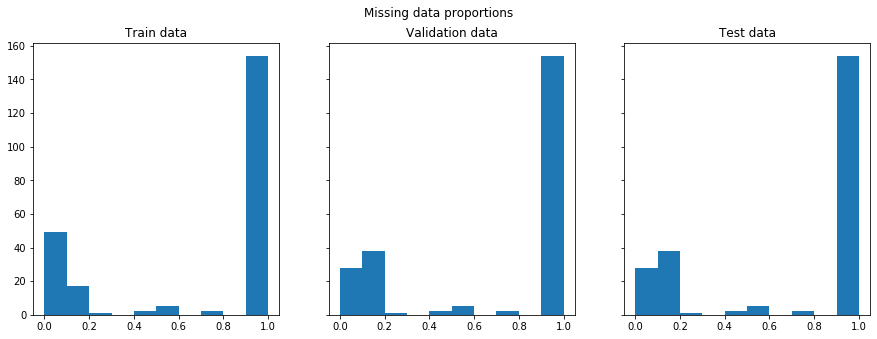

In [11]:
x_train_missing = x_train.isnull().sum() / x_train.shape[0]
x_val_missing = x_val.isnull().sum() / x_val.shape[0]
x_test_missing = x_test.isnull().sum() / x_test.shape[0]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharex="all", sharey="all")
ax1.hist(x_train_missing)
ax1.set_title("Train data")
ax2.hist(x_val_missing)
ax2.set_title("Validation data")
ax3.hist(x_test_missing)
ax3.set_title("Test data")

fig.suptitle("Missing data proportions")
plt.show()

I'll consider valid only features that have less than 15% of its total data as our model features

In [12]:
x_features = x_train_missing[x_train_missing <= .15].index

print(x_features)
print(len(x_features))

Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var73', 'Var74', 'Var76',
       'Var78', 'Var81', 'Var83', 'Var85', 'Var109', 'Var112', 'Var113',
       'Var119', 'Var123', 'Var125', 'Var132', 'Var133', 'Var134', 'Var140',
       'Var143', 'Var144', 'Var149', 'Var153', 'Var160', 'Var163', 'Var173',
       'Var181', 'Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var198',
       'Var199', 'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207',
       'Var208', 'Var210', 'Var211', 'Var212', 'Var216', 'Var217', 'Var218',
       'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var226', 'Var227',
       'Var228'],
      dtype='object')
66
